In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.utils.validation  import column_or_1d
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix , mean_squared_error 


In [3]:
def plotting(x_train , x_test , y_train , y_test ,predictions ) :  
    plt.figure()
    plt.plot(x_train, y_train, 'o')
    plt.plot(x_test, y_test, 'x')
    plt.plot(x_test, predictions, 'ro')
    plt.show()


def MLP(  hidden_layers=[20 , 40 , 50 , 30 ] , max_iter=100, x_train=None , y_train=None,x_test=None) : 
    mlp = MLPRegressor(
        hidden_layer_sizes=hidden_layers ,
        max_iter=max_iter ,
        activation='relu', 
        solver='adam' ,
        shuffle=True
    )   
    mlp.fit(x_train , y_train )
    predictions = mlp.predict(x_test)
    return predictions 


In [2]:
# create a function for plotting
def func0( x ) : 
    y_vals = 2*x + 37
    y_max = y_vals.max()
    y_vals = y_vals/abs( y_max)
    return y_vals

def func1(x) : 
    y_vals = np.sin(2*np.pi*x) + np.sin(5*np.pi*x) 
    y_max = y_vals.max()
    y_vals = y_vals/y_max
    return y_vals

def func2( x ) : 
    y_vals = np.sin(x) 
    y_max = y_vals.max()
    y_vals = y_vals/y_max
    return y_vals

def func3( x ) : 
    y_vals = np.cos(x)
    y_max = y_vals.max()
    y_vals = y_vals/y_max
    return y_vals

def func4( x ) : 
    y_vals =  np.exp(x) 
    y_max = y_vals.max()
    y_vals = y_vals/y_max
    return y_vals


def func5( x ) : 
    y_vals = np.exp(-x**2)-3*np.cos(x) 
    y_max = y_vals.max()
    y_vals = y_vals/y_max
    return y_vals

def func6( x ) : 
    y_vals = x**2 - 47*np.sin(x/2) 
    y_max = y_vals.max()
    y_vals = y_vals/y_max
    return y_vals

def func7( x ) : 
    y_vals = np.sin(x/2*np.pi) + np.exp(5*np.pi*x)
    y_max = y_vals.max()
    y_vals = y_vals/y_max
    return y_vals

def func8( x ) : 
    y_vals = np.sin(x/2*np.pi) + np.cos(5*np.pi*x) + np.sin((x**3)*np.pi)
    y_max = y_vals.max()
    y_vals = y_vals/y_max
    return y_vals

# x1_vals = np.arange(-1,1,0.002)
# y_max = y1_vals.max()
# y1_vals /= y_max

# x2_vals = np.arange(-2, 2 , 0.2)
# y_max = y2_vals.max()
# y2_vals /= y_max

# x3_vals = np.arange(-1,1,0.02)
# y3_vals =  
# y_max = y3_vals.max()
# y3_vals /= y_max

# x4_vals = np.arange(-1,1,0.2)
# y_max = y4_vals.max()
# y4_vals /= y_max

# x5_vals = np.arange(-5,5,0.02)
# y_max = y5_vals.max()
# y5_vals /= y_max

# x6_vals = np.arange(-5,5,0.2)
# y_max = y6_vals.max()
# y6_vals /= y_max

# x7_vals = np.arange(-1,1,0.02)
# y_max = y7_vals.max()
# y7_vals /= y_max

# x8_vals = np.arange(-2,2,0.002)
# y_max = y8_vals.max()
# y8_vals /= y_max


sample 0 : 

mse :  0.15439113706601001


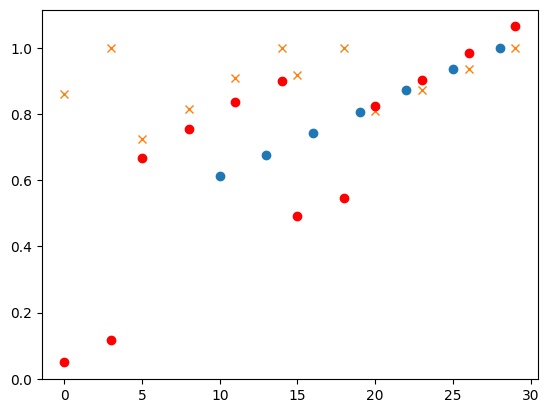

In [25]:
x_train = np.arange(10,30, 3 )
y_train = func0(x_train)  

x1_test = np.arange(0, 5 ,3)
y1_test = func0(x1_test)  

x2_test = np.arange(5,15,3)
y2_test = func0(x2_test)  

x3_test = np.arange(15,20 ,3)
y3_test = func0(x3_test)  

x4_test = np.arange(20,30,3)
y4_test = func0(x4_test)  

res = [y1_test,y2_test,y3_test,y4_test]
y_test = np.concatenate(res)

x_train = x_train.reshape(-1,1)
x1_test = x1_test.reshape(-1,1)
x2_test = x2_test.reshape(-1,1)
x3_test = x3_test.reshape(-1,1)
x4_test = x4_test.reshape(-1,1)


res = [x1_test,x2_test,x3_test,x4_test]
x_test = np.concatenate(res)


predictions1 = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=100, x_train=x_train, y_train=y_train ,x_test=x1_test) 
predictions2 = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=100, x_train=x_train, y_train=y_train ,x_test=x2_test) 
predictions3 = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=100, x_train=x_train, y_train=y_train ,x_test=x3_test) 
predictions4 = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=100, x_train=x_train, y_train=y_train ,x_test=x4_test) 

res = [predictions1,predictions2,predictions3,predictions4]
predictions = np.concatenate(res)

mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)



sample 0 with noise : 

mse :  0.0707990934293152


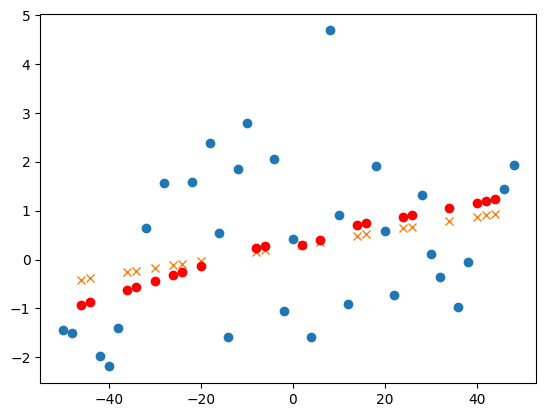

In [23]:

noise = np.random.normal( scale= 0.4, size= y_train.shape)
y_train = y_train + noise

predictions = MLP(  hidden_layers=[20,20,20,30 ] , max_iter=100, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


sample 1 : 

mse :  0.0017881916512469153


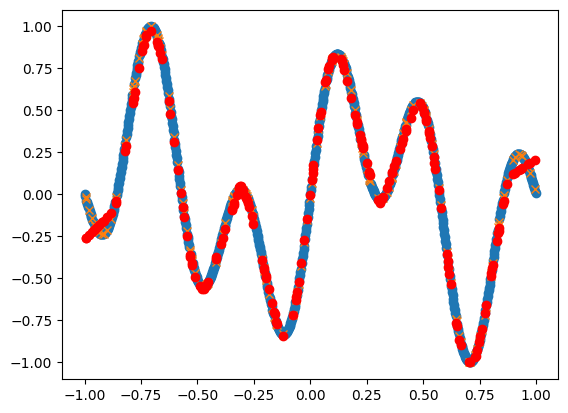

In [25]:

x_vals = x1_vals
y_vals = y1_vals 
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.20)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

predictions = MLP(  hidden_layers=[20,100,100,100,40 ] , max_iter=500, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


smaple 1 with noise : 

mse :  0.03599011756903178


c:\git\AIProjects2023-2024\NeuralNetWork\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


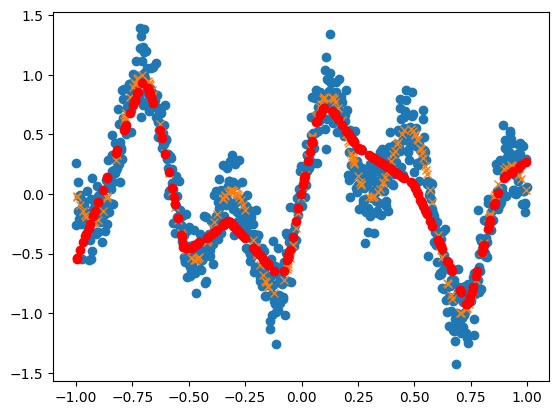

In [33]:
noise = np.random.normal( scale= 0.08, size= y_train.shape)
y_train = y_train + noise

predictions = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=200, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


sample 2 : 

mse :  0.005009133287463521


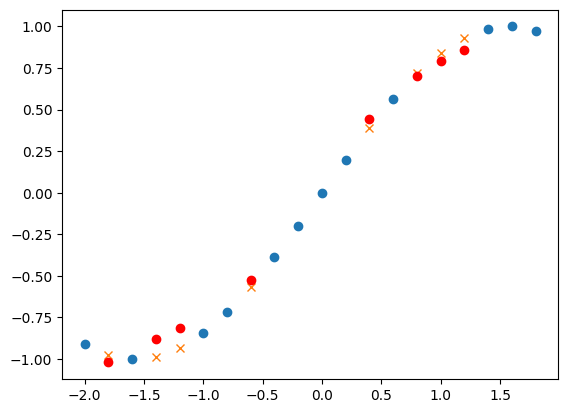

In [37]:
x_vals = x2_vals
y_vals = y2_vals 
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.40)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

predictions = MLP(  hidden_layers=[20,50,30 ] , max_iter=100, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)



sample 2 with noise : 

mse :  0.017620701707615108


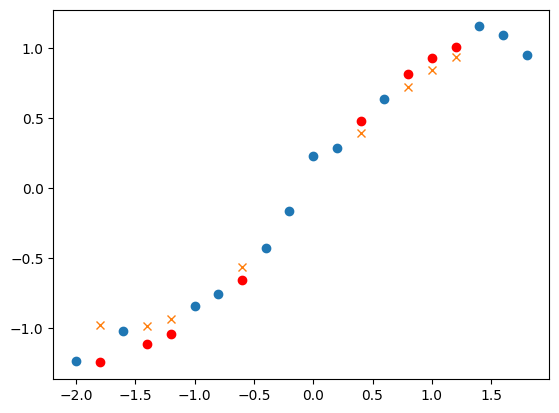

In [41]:
noise = np.random.normal( scale= 0.09, size= y_train.shape)
y_train = y_train + noise

predictions = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=200, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


sample 3 : 

mse :  0.0006466237004794665


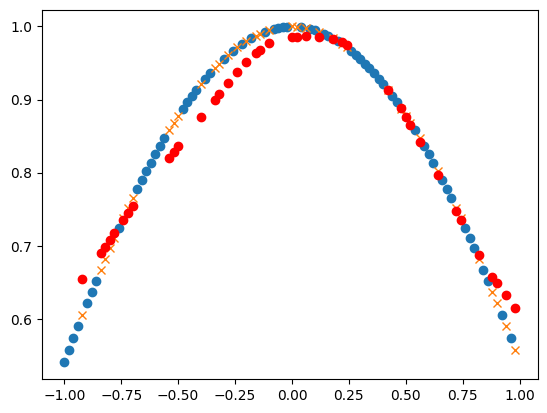

In [51]:
x_vals = x3_vals
y_vals = y3_vals 
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.40)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

predictions = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=300, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)



sample 3 with noise : 
    

mse :  0.0013046330768642124


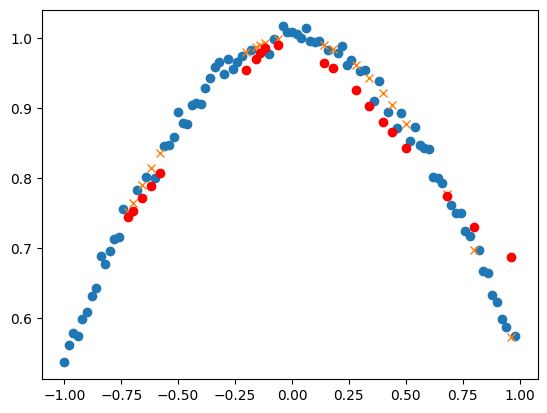

In [48]:

noise = np.random.normal( scale=0.01, size= y_train.shape)
y_train = y_train + noise 

predictions = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=300, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)

sample 4 : 

mse :  0.0003526075193598801


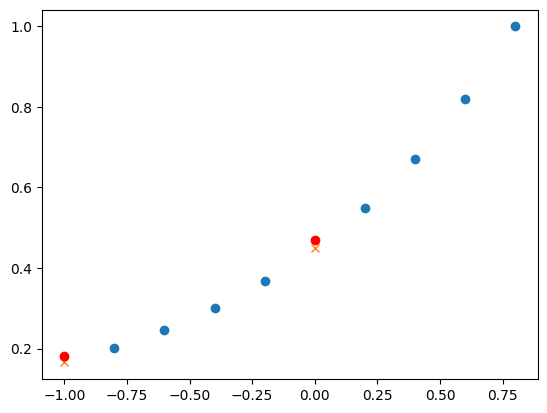

In [49]:
x_vals = x4_vals
y_vals = y4_vals 
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.20)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

predictions = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=300, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)



sample 4 with noise : 

mse :  0.0006219496357406644


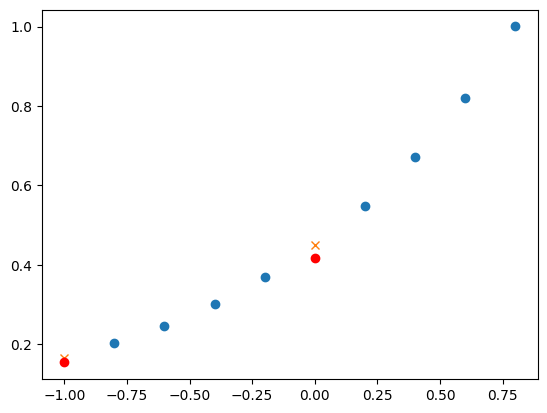

In [50]:
noise = np.random.normal( scale= 0.001, size= y_train.shape)
y_train = y_train + noise

predictions = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=200, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


sample 5 : 

mse :  0.0008772390809861568


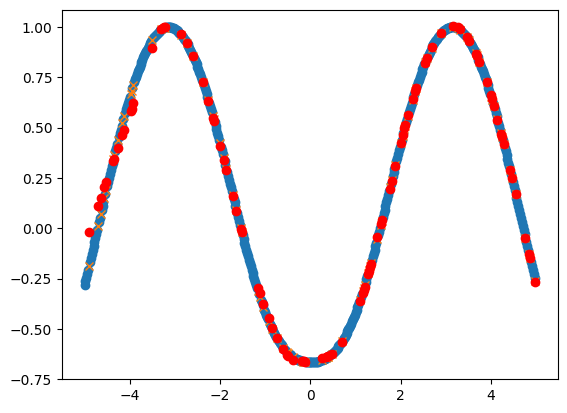

In [52]:
x_vals = x5_vals
y_vals = y5_vals 
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.20)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

predictions = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=300, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


sampel 5 with noise : 

mse :  0.006247704245351907


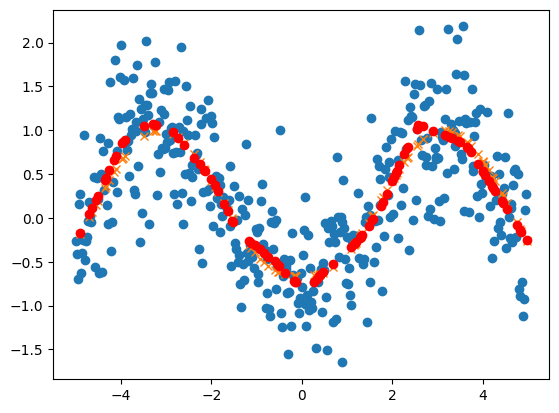

In [55]:
noise = np.random.normal( scale= 0.5, size= y_train.shape)
y_train = y_train + noise

predictions = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=200, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


sample 6 : 

mse :  0.004348967964236133


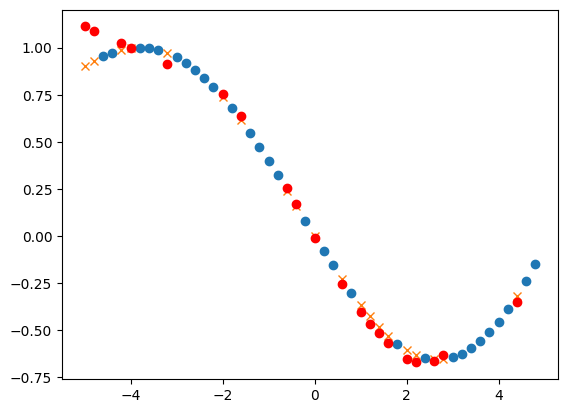

In [68]:
x_vals = x6_vals
y_vals = y6_vals 
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.4)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

predictions = MLP(  hidden_layers=[20,50,50,30] , max_iter=100, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)



sample 6 with noise : 

mse :  0.008356906689717874


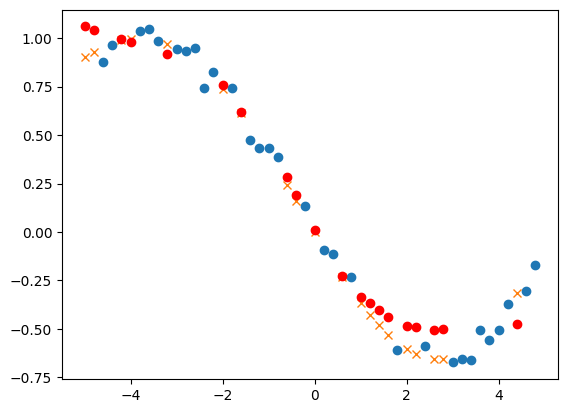

In [69]:
noise = np.random.normal( scale= 0.05, size= y_train.shape)
y_train = y_train + noise

predictions = MLP(  hidden_layers=[20,50,40,50,30 ] , max_iter=100, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


sample 7 : 

mse :  0.02194910106216665


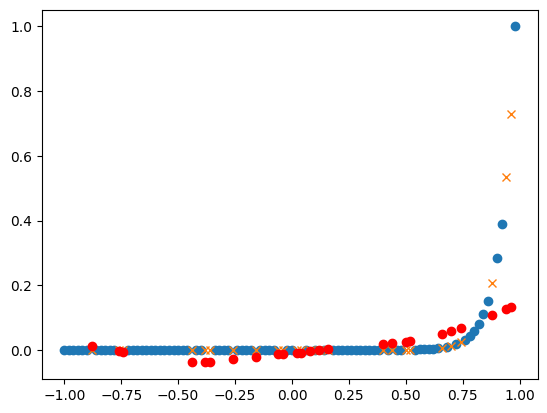

In [82]:
x_vals = x7_vals
y_vals = y7_vals 
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.25)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

predictions = MLP(  hidden_layers=[20,50,30] , max_iter=100, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


sample 7 with noise : 

mse :  0.04202467517709757


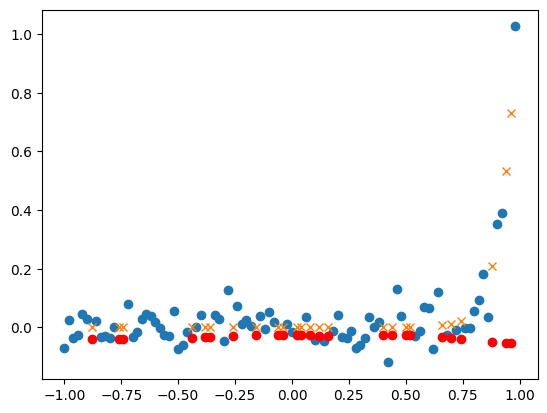

In [84]:
noise = np.random.normal( scale= 0.05, size= y_train.shape)
y_train = y_train + noise

predictions = MLP(  hidden_layers=[20,50,50,30 ] , max_iter=200, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


sample 8 :

mse :  0.014185775657993947


c:\git\AIProjects2023-2024\NeuralNetWork\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


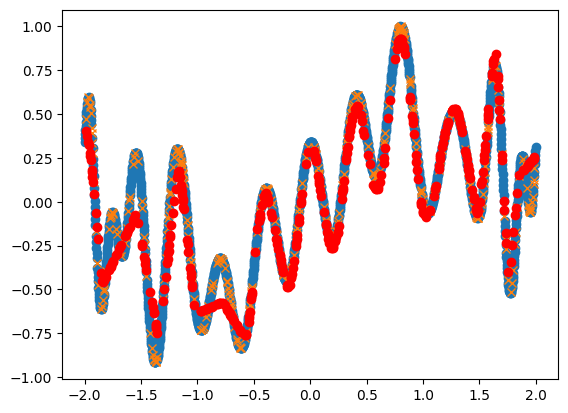

In [59]:
x_vals = x8_vals
y_vals = y8_vals 
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

predictions = MLP(  hidden_layers=[20,100,100,100,30] , max_iter=200, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)


mse :  0.014183102476496106


c:\git\AIProjects2023-2024\NeuralNetWork\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


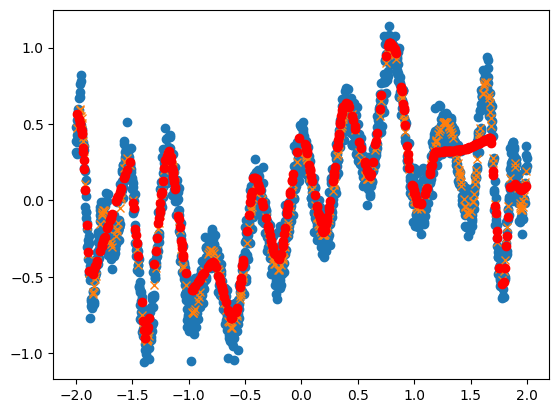

In [60]:
noise = np.random.normal( scale= 0.09, size= y_train.shape)
y_train = y_train + noise

predictions = MLP(  hidden_layers=[20,100,100,100,30] , max_iter=200, x_train=x_train, y_train=y_train ,x_test=x_test) 
mse = mean_squared_error(y_test, predictions)
print( "mse : " , mse )
plotting( x_train , x_test , y_train , y_test ,predictions=predictions)